In [ ]:
!pip install openvino==2022.03

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 19.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install dlib-bin 

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 28.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
#Import Package File
from argparse import Namespace
import sys
import paddle
import paddle.vision.transforms as transforms
import numpy as np
import PIL.Image
from PIL import ImageFile
from PIL import Image
import glob 
import os
from tqdm import tqdm
import argparse
sys.path.append(".")
sys.path.append("..")
ImageFile.LOAD_TRUNCATED_IMAGES = True
#图片处理工具类文件
import cv2
from IPython.display import display
import matplotlib.pyplot as plt
from argparse import Namespace
from tqdm import tqdm
from paddle.vision.transforms import Normalize
from openvino.runtime import Core
import dlib
data_dir = '/home/aistudio/test_data'

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


Upload images of shaved heads to the directory：/home/aistudio/test_data/faceorigin/

In [ ]:
!python /home/aistudio/aligned/align_images.py

In [ ]:
#Check if openvino installation was successful
!python -c "from openvino.runtime import Core"

In [ ]:
ie_core=Core()
img_transforms = transforms.Compose([
          transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])]
            )


In [ ]:
onnx_model = "/home/aistudio/openvino/e4e_ffhq_encode.onnx"
model_com = ie_core.read_model(model=onnx_model)
exec_net=ie_core.compile_model(model=model_com,device_name= "AUTO")
print(exec_net.input)
output_layer = exec_net.output(0)
file_dir = os.path.join(data_dir,'origin')
code_dir = os.path.join(data_dir,'code')
if not os.path.exists(code_dir):
    os.mkdir(code_dir)
for file_path in glob.glob(os.path.join(file_dir,'*.png'))+glob.glob(os.path.join(file_dir,'*.jpg')):
    name = os.path.basename(file_path)[:-4]
    code_path =os.path.join(code_dir,f'{name}.npy')
    if os.path.exists(code_path):
        continue
    input_image = PIL.Image.open(file_path)
    transformed_image = img_transforms(input_image)
    latents =exec_net([transformed_image.unsqueeze(0)])[output_layer]
    # latent = latents[0].numpy()
    # latent = np.reshape(latent,(1,18,512))
    #from IPython.core.debugger import Pdb; Pdb().set_trace()
    np.save(code_path,latents)
    # print(f'save to {code_path}')

<bound method PyCapsule.input of <CompiledModel:
inputs[
<ConstOutput: names[input] shape[1,3,256,256] type: f32>
]
outputs[
<ConstOutput: names[output] shape[1,18,512] type: f32>
]>>


In [ ]:
onnx_mapper = "/home/aistudio/openvino/mapper.onnx"
model_mapper = ie_core.read_model(model=onnx_mapper)
mapper_net=ie_core.compile_model(model=model_mapper,device_name= "AUTO")
output_mapper = mapper_net.output(0)
x = iter(mapper_net.inputs)
for i in x:
    print(i)
y = iter(mapper_net.outputs)
for i in y:
    print('输出'+str(i))
onnx_StyleGAN2= "/home/aistudio/openvino/StyleGAN2-ada-Generator.onnx"
model_StyleGAN2= ie_core.read_model(model=onnx_StyleGAN2)
StyleGAN2ada_net=ie_core.compile_model(model=model_StyleGAN2,device_name= "AUTO")
output_StyleGAN2ada = StyleGAN2ada_net.output(0)
output_StyleGAN2ada1 = StyleGAN2ada_net.output(1)
x = iter(StyleGAN2ada_net.inputs)
for i in x:
    print(i)
y = iter(StyleGAN2ada_net.outputs)
for i in y:
    print('输出'+str(i))
onnx_face_parsing = "/home/aistudio/openvino/face_parsing.onnx"
model_face_parsing = ie_core.read_model(model=onnx_face_parsing)
faceparsing_net=ie_core.compile_model(model=model_face_parsing,device_name= "AUTO")
output_faceparsing= faceparsing_net.output(0)
x = iter(faceparsing_net.inputs)
for i in x:
    print(i)
y = iter(faceparsing_net.outputs)
for i in y:
    print('输出'+str(i))

<ConstOutput: names[input] shape[1,18,512] type: f32>
输出<ConstOutput: names[output] shape[1,8,512] type: f32>
<ConstOutput: names[input1] shape[1,18,512] type: f32>
输出<ConstOutput: names[output1] shape[1,3,1024,1024] type: f32>
输出<ConstOutput: names[output2] shape[1,512] type: f32>
输出<ConstOutput: names[394] shape[1,512] type: f32>
输出<ConstOutput: names[474] shape[1,512] type: f32>
输出<ConstOutput: names[703] shape[1,512] type: f32>
输出<ConstOutput: names[933] shape[1,512] type: f32>
输出<ConstOutput: names[1014] shape[1,512] type: f32>
输出<ConstOutput: names[1243] shape[1,512] type: f32>
输出<ConstOutput: names[1473] shape[1,512] type: f32>
输出<ConstOutput: names[1554] shape[1,512] type: f32>
输出<ConstOutput: names[1783] shape[1,512] type: f32>
输出<ConstOutput: names[2013] shape[1,512] type: f32>
输出<ConstOutput: names[2094] shape[1,512] type: f32>
输出<ConstOutput: names[2323] shape[1,512] type: f32>
输出<ConstOutput: names[2553] shape[1,512] type: f32>
输出<ConstOutput: names[2634] shape[1,512] type

In [ ]:
    def mkdir(path):
        if not os.path.exists(path):
            os.mkdir(path)

    alpha =0.48
    model_name = 'stylegan2_ada'
    latent_space_type = 'wp'
    kwargs = {'latent_space_type': latent_space_type}
    # data_dir = '/home/aistudio/test_data'
    code_dir = os.path.join(data_dir, 'code')
    origin_img_dir = os.path.join(data_dir, 'origin')
    res_dir = os.path.join(data_dir, 'mapper_res')
    if not os.path.exists(res_dir):
        mkdir(res_dir)
    code_list = glob.glob(os.path.join(code_dir, '*.npy'))
    total_num = len(code_list)
    print(f'Editing {total_num} samples.')
    pbar = tqdm(total=total_num)

Editing 1 samples.


  0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
class BaseGenerator: 
     def __init__(self):
        self.min_val = getattr(self, 'min_val', -1.0)
        self.max_val = getattr(self, 'max_val', 1.0)
        self.output_channels = getattr(self, 'output_channels', 3)
        self.channel_order = getattr(self, 'channel_order', 'RGB').upper()
        self.resolution = 1024
     def postprocess(self, images):
        if not isinstance(images, np.ndarray):
            raise ValueError(f'Images should be with type `numpy.ndarray`!')

        images_shape = images.shape
        if len(images_shape) != 4 or images_shape[1] not in [1, 3]:
            raise ValueError(f'Input should be with shape [batch_size, channel, '
                             f'height, width], where channel equals to 1 or 3. '
                             f'But {images_shape} is received!')
        images = (images - self.min_val) * 255 / (self.max_val - self.min_val)
        images = np.clip(images + 0.5, 0, 255).astype(np.uint8)#np.clip是一个截取函数，用于截取数组中小于或者大于某值的部分，并使得被截取部分等于固定值
        images = images.transpose(0, 2, 3, 1)#这里images.transpose([0, 2, 3, 1])是将images的shape变成[num,img_size, img_size,num_channels ]
        if self.channel_order == 'BGR':
            images = images[:, :, :, ::-1]#image[:,:,::-1]作用：对颜色通道做变换，将图片从RGB图片转成BGR图片 或BGR图片转成RGB图片
        return images
    
     def preprocess(self, image):
        if not isinstance(image, np.ndarray):
            raise ValueError(f'Input image should be with type `numpy.ndarray`!')
        if image.dtype != np.uint8:
            raise ValueError(f'Input image should be with dtype `numpy.uint8`!')

        if image.ndim != 3 or image.shape[2] not in [1, 3]:
            raise ValueError(f'Input should be with shape [height, width, channel], '
                             f'where channel equals to 1 or 3!\n'
                             f'But {image.shape} is received!')
        if image.shape[2] == 1 :
            image = np.tile(image, (1, 1, 3))
        if image.shape[2] != 3:
            raise ValueError(f'Number of channels of input image, which is '
                             f'{image.shape[2]}, is not supported by the current '
                             f'inverter, which requires {3} '
                             f'channels!')

        if self.channel_order == 'BGR':
            image = image[:, :, ::-1]
        if image.shape[1:3] != [self.resolution, self.resolution]:
            image = cv2.resize(image, (self.resolution, self.resolution))
        image = image.astype(np.float32)
        image = (image / 255.0 - 0.5) / 0.5
        image = image.astype(np.float32).transpose(2, 0, 1)

        return image
     def get_value(self, tensor):
        if isinstance(tensor, list):
            res=[]
            for i in tensor:
                res.append(i.to(self.cpu_device).detach().numpy())
            return res
        if isinstance(tensor, np.ndarray):
            return tensor
        if isinstance(tensor, paddle.Tensor):
            return tensor.to(self.cpu_device).detach().numpy()
        raise ValueError(f'Unsupported input type `{type(tensor)}`!')

def parsing_hair_mask(parsing_anno, stride=1,include_hat=False,include_ear=False):
    # Colors for all 20 parts
    part_colors = [255, 255, 255]
    ## 插值方法默认是cv2.INTER_LINEAR，这里指定为最近邻插值
    vis_parsing_anno = parsing_anno.copy().astype(np.uint8)
    vis_parsing_anno = cv2.resize(vis_parsing_anno, None, fx=stride, fy=stride, interpolation=cv2.INTER_NEAREST)
    vis_parsing_anno_color = np.zeros((vis_parsing_anno.shape[0], vis_parsing_anno.shape[1], 3)) + 255
    indexes = [17]
    if include_hat:
        indexes .append(18)
    if include_ear:
        indexes.append(7)
        indexes.append(8)
    hair_mask = np.zeros_like(vis_parsing_anno_color, np.uint8)#np.zeros_like就是输出（）中形状相同的列表，不同的是其中的元素都为0.
    for pi in indexes:
        index = np.where(vis_parsing_anno == pi)
        temp = np.zeros_like(vis_parsing_anno_color)
        temp[index[0], index[1], :] = part_colors

        temp = temp.astype(np.uint8)
        hair_mask = np.bitwise_or(temp, hair_mask)# bitwise_or()函数对数组中整数的二进制形式执行位或运算。

    return hair_mask
def _get_tensor_value(tensors):
    if isinstance(tensors,list):
        res=[]
        for i in tensors:
            for j in i:
                res.append(j)
        return res
    else:
        return tensors

In [23]:
    import matplotlib.pyplot as plt
    baseuitl=BaseGenerator()
    for index in range(total_num):
        pbar.update(1)
        code_path = code_list[index]
        name = os.path.basename(code_path)[:-4]
        f_path_png = os.path.join(origin_img_dir, f'{name}.png')
        f_path_jpg = os.path.join(origin_img_dir, f'{name}.jpg')
        # if os.path.exists(os.path.join(res_dir, f'{name}.png')):
        #     continue
        if os.path.exists(f_path_png):
            origin_img_path = f_path_png
        elif os.path.exists(f_path_jpg):
            origin_img_path = f_path_jpg
        # else:
        #     continue
        latent_codes_origin = np.reshape(np.load(code_path), (1, 18, 512))
        mapper_input = latent_codes_origin.copy()
        mapper_input_tensor = paddle.to_tensor(mapper_input,dtype='float32')
        edited_latent_codes = latent_codes_origin
        mappelatents =mapper_net([mapper_input_tensor])[output_mapper]  #1
        edited_latent_codes[:, :8, :] += alpha * mappelatents
        origin_img = cv2.imread(origin_img_path)
        #stylespace_latent准备模型数据
        latent_codes=edited_latent_codes
        style_codes=latent_codes_origin
        style_range=range(7, 18)
        mix_ratio=0.8
        wps=latent_codes
        style_wps=style_codes
        mixed_wps=wps
        # from IPython.core.debugger import Pdb; Pdb().set_trace()
        mixed_wps[:,style_range,:]*=1-mix_ratio
        mixed_wps[:,style_range,:]+=style_wps[:,style_range,:]*mix_ratio
        outputs = {}
        mixed_img =StyleGAN2ada_net([mixed_wps])[output_StyleGAN2ada]  #2
        stylespace_latent =StyleGAN2ada_net([mixed_wps])[output_StyleGAN2ada1]  #2
        outputs['image'] = baseuitl.get_value(mixed_img)
        outputs['stylespace_latent']=baseuitl.get_value(stylespace_latent)
        outputs['mixed_wps'] = mixed_wps

        if 'image' in outputs:
            outputs['image'] = baseuitl.postprocess(outputs['image'])
        if 'origin_image' in outputs:
            outputs['origin_image'] = baseuitl.postprocess(outputs['origin_image'])

        edited_img = outputs['image'][0][:, :, ::-1]
        # --remain_ear: preserve the ears in the original input image：保留原始输入图像中的耳朵
        #Compose就是对**transform.**的相关函数进行组合，使成一个代码块
        to_tensor =paddle.vision.transforms.Compose([
            paddle.vision.transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ])
        image =Image.fromarray(origin_img)
        image = image.resize((512, 512), Image.BILINEAR)#双线性插值（bilinear）
        img_input= to_tensor(image)
        img_input = paddle.unsqueeze(img_input, 0)
        img_shape =origin_img.shape
        out=faceparsing_net(img_input)[output_faceparsing]  #3
        parsing = out.squeeze(0).argmax(0)
        dilate_kernel=10
        include_hat=False
        blur=False
        include_ear=True
        hair_mask=parsing_hair_mask(parsing, stride=1,include_hat=include_hat,include_ear=include_ear)
        if dilate_kernel>0:
            hair_mask = cv2.dilate(hair_mask, kernel=np.ones((dilate_kernel, dilate_kernel), np.uint8))
        hair_mask=cv2.resize(hair_mask,(img_shape[1],img_shape[0]))

        if blur:
            hair_mask = cv2.dilate(hair_mask, kernel=np.ones((10, 10), np.uint8))
            hair_mask = cv2.blur(hair_mask, ksize=(25, 25))
        #faceparsing_net
        dilate_kernel_size=50
        blur_kernel_size=30
        mask_dilate = cv2.dilate(hair_mask,kernel=np.ones((dilate_kernel_size, dilate_kernel_size), np.uint8))
        mask_dilate_blur = cv2.blur(mask_dilate, ksize=(blur_kernel_size, blur_kernel_size))
        mask_dilate_blur = (hair_mask + (255 - hair_mask) / 255 * mask_dilate_blur).astype(np.uint8)
        face_mask = 255 - mask_dilate_blur
        index = np.where(face_mask > 0)
        cy = (np.min(index[0]) + np.max(index[0])) // 2
        cx = (np.min(index[1]) + np.max(index[1])) // 2
        center = (cx, cy)
        res_save_path = os.path.join(res_dir, f'{name}.png')
        mixed_clone = cv2.seamlessClone(origin_img, edited_img, face_mask[:, :, 0], center, cv2.NORMAL_CLONE)
        cv2.imwrite(res_save_path, mixed_clone)


10it [48:42, 368.59s/it]

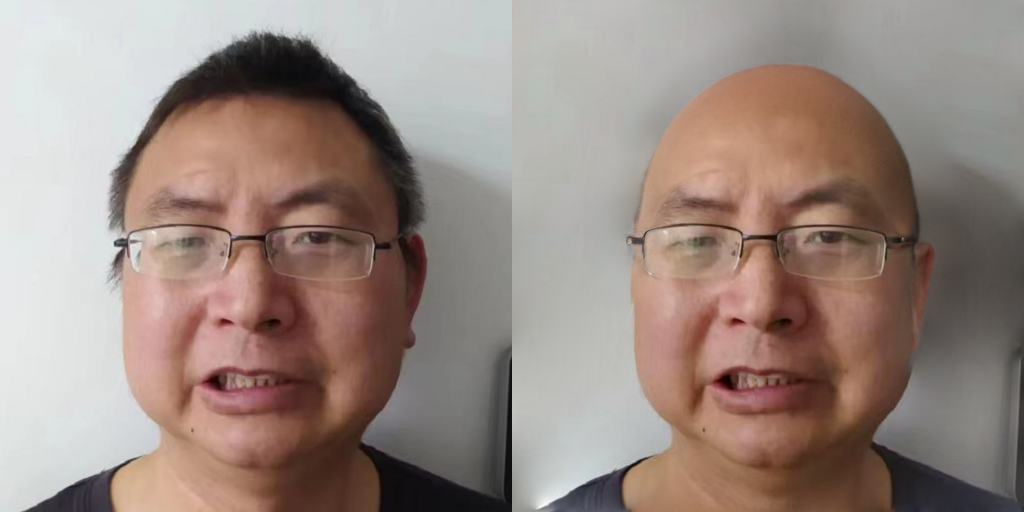

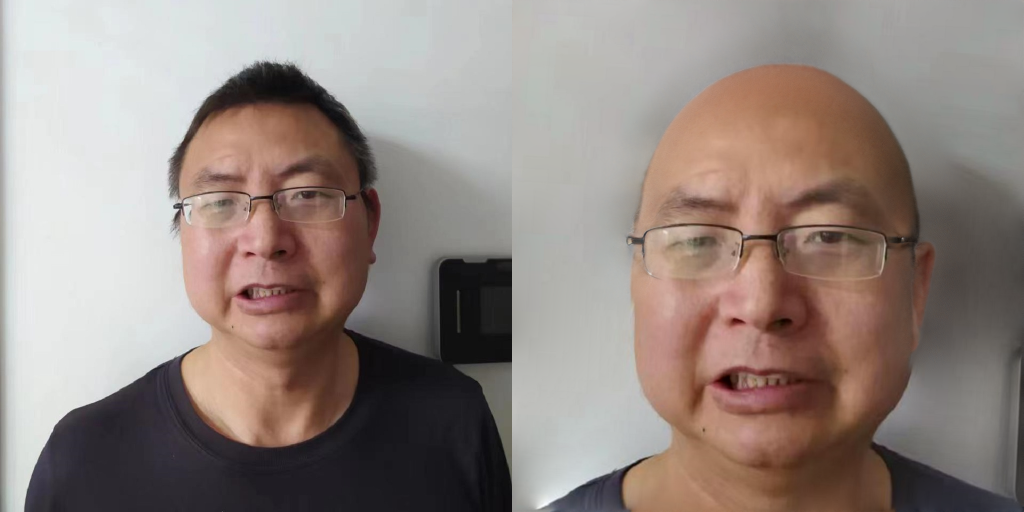

In [24]:
for res_path in glob.glob('/home/aistudio/test_data/mapper_res/*'):
    res_img = cv2.imread(res_path)[:,:,::-1]
    input_path = res_path.replace('mapper_res','origin')
    input_img = cv2.imread(input_path)[:,:,::-1]
    input_img=cv2.resize(input_img, (1024,1024))
#     from IPython.core.debugger import Pdb; Pdb().set_trace()
    visualize = np.concatenate([input_img,res_img], axis=1)
    visualize=cv2.resize(visualize, (1024,512))
    res_im = Image.fromarray(visualize)
   
    display(res_im)

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 